<a href="https://colab.research.google.com/github/NiloufarYousefi/-Final-project/blob/main/ML_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
### Data Preprocessing and Cleaning:
- Dataset loaded from Google Drive.
- Missing values were handled by dropping rows with missing values.
- Duplicates were checked and removed if necessary.


First 5 rows of the dataset:
    work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES    

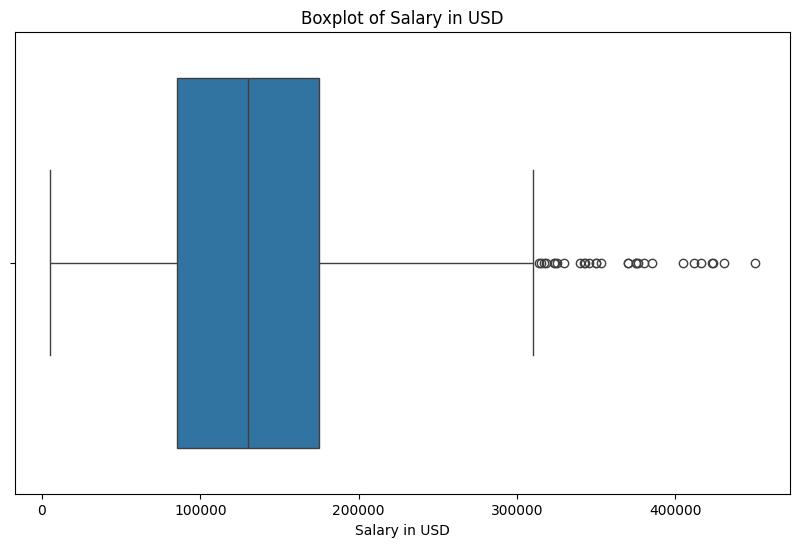

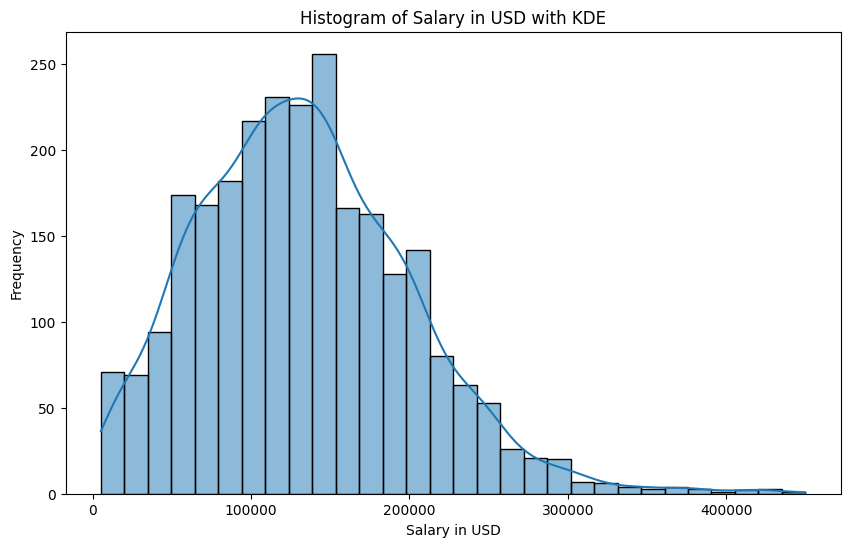

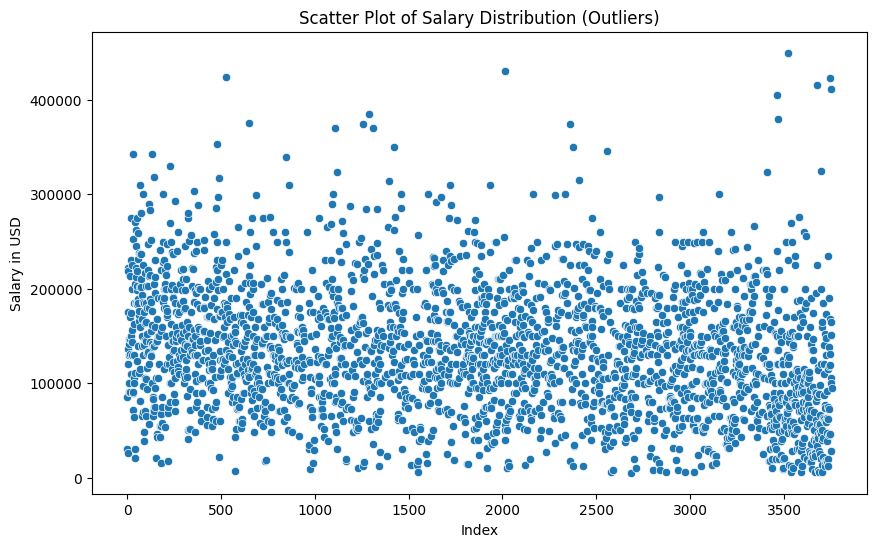

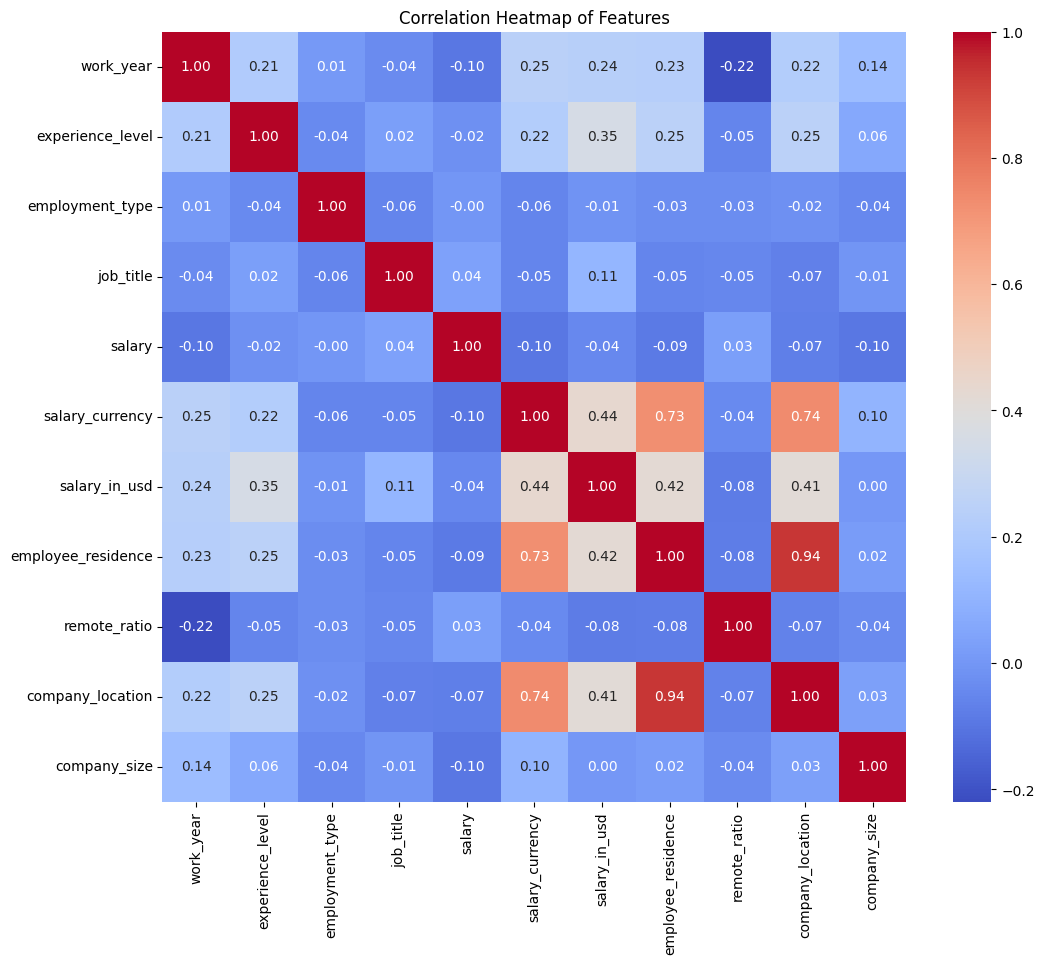


Linear Regression Evaluation Metrics:
MAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R²: 1.0000

Decision Tree Evaluation Metrics:
MAE: 378.4768
MSE: 13753815.8557
RMSE: 3708.6137
R²: 0.9968

Random Forest Evaluation Metrics:
MAE: 375.4949
MSE: 13338151.3184
RMSE: 3652.1434
R²: 0.9969

The best performing model is: Linear Regression


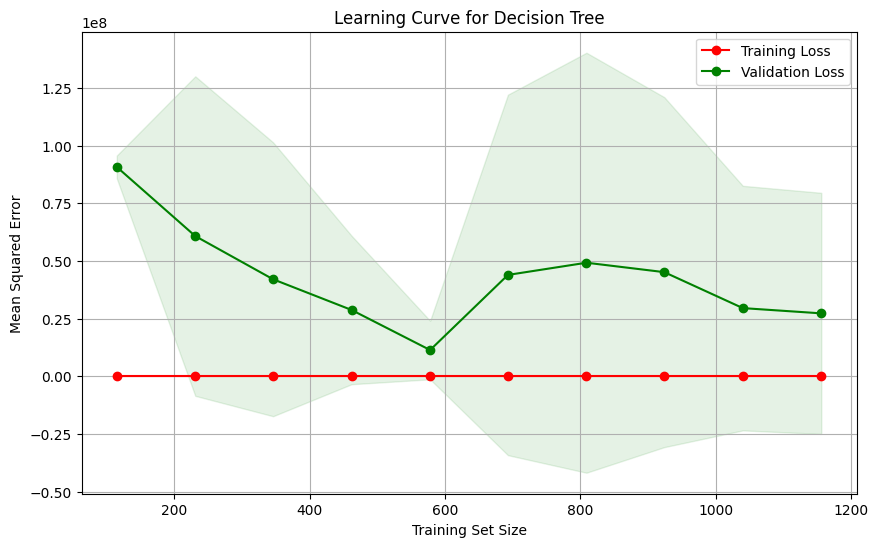

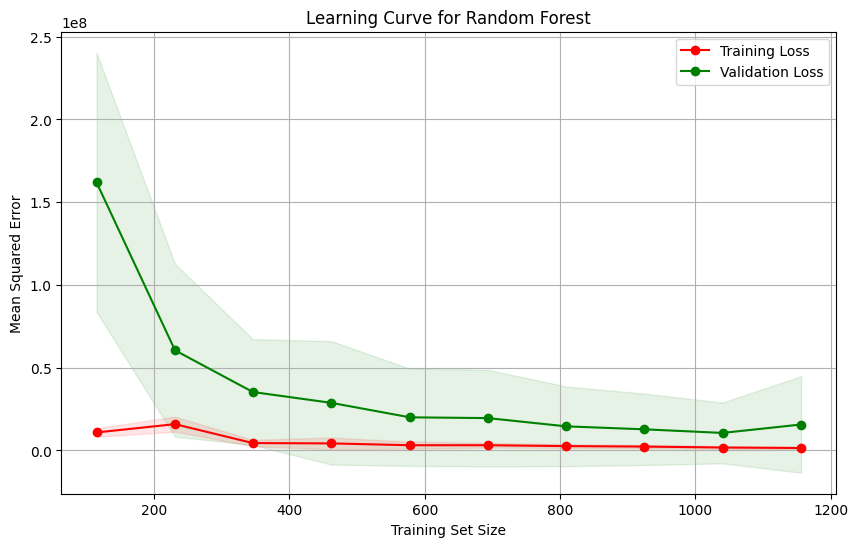

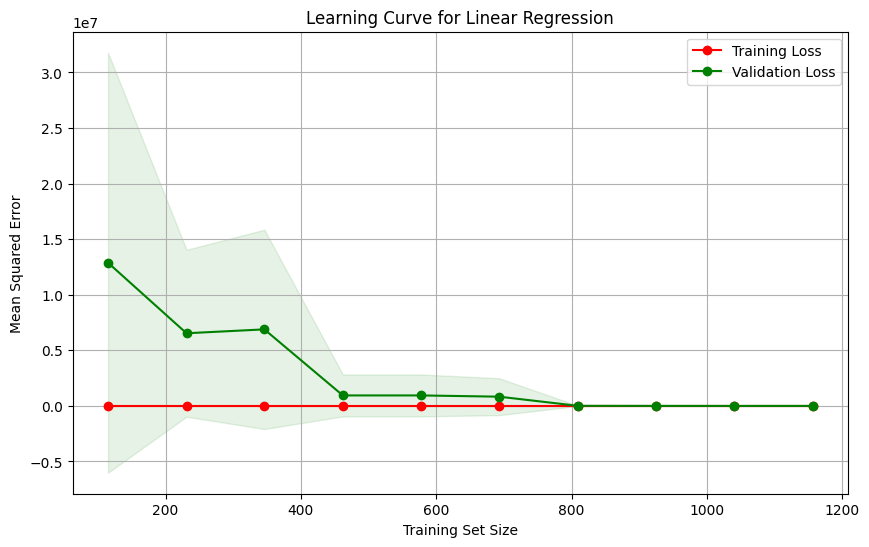


Evaluation Results Structure:

Linear Regression:
  MAE: 0.0000
  MSE: 0.0000
  RMSE: 0.0000
  R² (Train): 1.0000
  R² (Val): 1.0000
  R² (Test): 1.0000

Decision Tree:
  MAE: 378.4768
  MSE: 13753815.8557
  RMSE: 3708.6137
  R² (Train): 1.0000
  R² (Val): 0.9942
  R² (Test): 0.9968

Random Forest:
  MAE: 375.4949
  MSE: 13338151.3184
  RMSE: 3652.1434
  R² (Train): 0.9996
  R² (Val): 0.9946
  R² (Test): 0.9969

Linear Regression does not show signs of overfitting.

Decision Tree does not show signs of overfitting.

Random Forest does not show signs of overfitting.

Ridge Regression Evaluation Metrics:
MAE: 59.0069
MSE: 5442.1250
RMSE: 73.7708
R² (Train): 1.0000
R² (Val): 1.0000
R² (Test): 1.0000

Lasso Regression Evaluation Metrics:
MAE: 10.5469
MSE: 2612.6251
RMSE: 51.1138
R² (Train): 1.0000
R² (Val): 1.0000
R² (Test): 1.0000
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters for Decision Tree:
{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split':

In [80]:
# ---------------------- Importing Libraries ----------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Scikit-learn modules
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------------------- Report Generation ----------------------
report = """
### Data Preprocessing and Cleaning:
- Dataset loaded from Google Drive.
- Missing values were handled by dropping rows with missing values.
- Duplicates were checked and removed if necessary.
"""
display(Markdown(report))

# ---------------------- Data Loading and Inspection ----------------------
df = pd.read_csv('/content/drive/MyDrive/ds_salaries.csv')
print("First 5 rows of the dataset:\n", df.head())
print("\nDataset Info:\n", df.info())
print("\nStatistical Summary:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

# ---------------------- Data Cleaning ----------------------
df_clean = df.dropna()
print("\nDataset Shape after dropping missing values:", df_clean.shape)

duplicates = df_clean.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print("Duplicates dropped. New shape:", df_clean.shape)

# ---------------------- Data Visualization ----------------------
plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean['salary_in_usd'])
plt.title("Boxplot of Salary in USD")
plt.xlabel("Salary in USD")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_clean['salary_in_usd'], kde=True, bins=30)
plt.title("Histogram of Salary in USD with KDE")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_clean.index, y=df_clean['salary_in_usd'])
plt.xlabel("Index")
plt.ylabel("Salary in USD")
plt.title("Scatter Plot of Salary Distribution (Outliers)")
plt.show()

df_corr = df_clean.copy()
label_encoders = {}
for col in ['experience_level', 'employment_type', 'job_title', 'salary_currency',
            'employee_residence', 'company_location', 'company_size']:
    le = LabelEncoder()
    df_corr[col] = le.fit_transform(df_corr[col])
    label_encoders[col] = le

plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

# ---------------------- Data Preprocessing ----------------------
for col in ['experience_level', 'employment_type', 'job_title', 'salary_currency',
            'employee_residence', 'company_location', 'company_size']:
    df_clean[col] = label_encoders[col].transform(df_clean[col])

X = df_clean.drop(columns=['salary', 'salary_currency'])
y = df_clean['salary_in_usd']

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# ---------------------- Model Training and Evaluation ----------------------
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

def train_and_evaluate(models, X_train, X_val, X_test, y_train, y_val, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        metrics = {
            'MAE': mean_absolute_error(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
            'R²': r2_score(y_test, y_test_pred)
        }
        results[name] = metrics
    return results

evaluation_results = train_and_evaluate(models, X_train_poly, X_val_poly, X_test_poly, y_train, y_val, y_test)

for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

best_model = max(evaluation_results, key=lambda x: evaluation_results[x]['R²'])
print(f"\nThe best performing model is: {best_model}")

# ---------------------- Learning Curve Analysis ----------------------
def plot_learning_curve(model, X_train, y_train, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Loss')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation Loss')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

plot_learning_curve(DecisionTreeRegressor(random_state=42), X_train_poly, y_train, "Learning Curve for Decision Tree")
plot_learning_curve(RandomForestRegressor(random_state=42), X_train_poly, y_train, "Learning Curve for Random Forest")
plot_learning_curve(LinearRegression(), X_train_poly, y_train, "Learning Curve for Linear Regression")

# Function to train models and evaluate performance
def train_and_evaluate(models, X_train, X_val, X_test, y_train, y_val, y_test):
    results = {}
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

        # Evaluation metrics
        metrics = {
            'MAE': mean_absolute_error(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
            'R² (Train)': r2_score(y_train, y_train_pred),
            'R² (Val)': r2_score(y_val, y_val_pred),
            'R² (Test)': r2_score(y_test, y_test_pred)
        }
        results[name] = metrics
    return results

# Get evaluation results
evaluation_results = train_and_evaluate(models, X_train_poly, X_val_poly, X_test_poly, y_train, y_val, y_test)

# Print the structure of evaluation_results to ensure keys are correct
print("\nEvaluation Results Structure:")
for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# ---------------------- Overfitting Detection ----------------------

# Check for overfitting by comparing R² on training, validation, and test sets
for model_name, metrics in evaluation_results.items():
    # Access the R² metrics safely
    try:
        train_r2 = metrics['R² (Train)']
        val_r2 = metrics['R² (Val)']
        test_r2 = metrics['R² (Test)']

        if train_r2 == 1.0000 and test_r2 < 0.8:
            print(f"\nWarning: {model_name} may be overfitting. Train R² is 1.0, but Test R² is {test_r2:.4f}.")
        elif train_r2 > val_r2 and val_r2 > test_r2:
            print(f"\nWarning: {model_name} may be overfitting. Training R² is higher than Validation and Test R².")
        else:
            print(f"\n{model_name} does not show signs of overfitting.")

    except KeyError as e:
        print(f"KeyError: {e} - Please check the evaluation results structure.")

# ---------------------- Regularization and Hyperparameter Tuning ----------------------

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge and Lasso Regression (Regularization for Linear Regression)
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Train and evaluate Ridge and Lasso
models_regularized = {'Ridge Regression': ridge, 'Lasso Regression': lasso}

def train_and_evaluate_regularized(models, X_train, X_val, X_test, y_train, y_val, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)

        metrics = {
            'MAE': mean_absolute_error(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
            'R² (Train)': r2_score(y_train, y_train_pred),
            'R² (Val)': r2_score(y_val, y_val_pred),
            'R² (Test)': r2_score(y_test, y_test_pred)
        }
        results[name] = metrics
    return results

# Get evaluation results for regularized models
evaluation_results_regularized = train_and_evaluate_regularized(models_regularized, X_train_poly, X_val_poly, X_test_poly, y_train, y_val, y_test)

# Display evaluation results for regularized models
for model_name, metrics in evaluation_results_regularized.items():
    print(f"\n{model_name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# ---------------------- Hyperparameter Tuning for Decision Tree and Random Forest ----------------------

# Define parameter grids for tuning
param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Decision Tree GridSearchCV
dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(dt_regressor, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train_poly, y_train)

# Best parameters and model for Decision Tree
print("\nBest Parameters for Decision Tree:")
print(grid_search_dt.best_params_)
best_dt_model = grid_search_dt.best_estimator_

# Random Forest GridSearchCV
rf_regressor = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_poly, y_train)

# Best parameters and model for Random Forest
print("\nBest Parameters for Random Forest:")
print(grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# ---------------------- Retraining and Evaluating Tuned Models ----------------------

# Evaluate the tuned models
tuned_models = {
    'Tuned Decision Tree': best_dt_model,
    'Tuned Random Forest': best_rf_model
}

# Get evaluation results for tuned models
evaluation_results_tuned = train_and_evaluate(tuned_models, X_train_poly, X_val_poly, X_test_poly, y_train, y_val, y_test)

# Display evaluation results for tuned models
for model_name, metrics in evaluation_results_tuned.items():
    print(f"\n{model_name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

from sklearn.model_selection import cross_val_score
import numpy as np

# Define the model
lr_model = LinearRegression()

# Perform k-fold cross-validation
cv_scores = cross_val_score(lr_model, X_train_poly, y_train, cv=5, scoring='r2')

# Display the cross-validation results
print(f"Linear Regression - Cross-Validation R² scores: {cv_scores}")
print(f"Mean Cross-Validation R²: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation R²: {cv_scores.std():.4f}")

# If R² is much lower in cross-validation than in the train/test sets, it indicates overfitting

